<a href="https://colab.research.google.com/github/Aditi-10/Analysis/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict whether the Zomato Restaurants in Bengaluru as per its features will be a success or not, using Machine Learning Algorithms

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
#Reading the data 
df= pd.read_csv("zomato.csv")

In [ ]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [ ]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (51717, 17)


In [ ]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

## *An overview from the data*

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [ ]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

## Problem Statements:
- Getting all the NAN features
- Getting all the data types of features and it's overview

In [ ]:
feature_na =[]
for feature in df.columns:
    if df[feature].isnull().sum()>1:
        feature_na.append(feature)
feature_na        

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [ ]:
df["rate"].isnull().sum()/len(df)*100

15.033741322969234

In [ ]:
#% of missing values 
for feature in feature_na:
    print("{} has {} % missing values" .format(feature,np.round(df[feature].isnull().sum()/len(df)*100,4)))

rate has 15.0337 % missing values
phone has 2.3358 % missing values
location has 0.0406 % missing values
rest_type has 0.4389 % missing values
dish_liked has 54.2916 % missing values
cuisines has 0.087 % missing values
approx_cost(for two people) has 0.669 % missing values


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

## Problem Statements:
- Data Cleaning on Approx_cost feature
- Cleaning the rate_num column

In [ ]:
df[df["approx_cost(for two people)"].isnull()]

url  \
1662   https://www.zomato.com/bangalore/papa-khan-ras...   
1768   https://www.zomato.com/bangalore/innate-jp-nag...   
1795   https://www.zomato.com/bangalore/super-chefs-b...   
3069   https://www.zomato.com/bangalore/super-chefs-b...   
3774   https://www.zomato.com/bangalore/the-hub-ibis-...   
...                                                  ...   
50940  https://www.zomato.com/bangalore/cinnabon-whit...   
51233  https://www.zomato.com/bangalore/mayas-kitchen...   
51247  https://www.zomato.com/bangalore/mast-kalandar...   
51271  https://www.zomato.com/bangalore/karavalli-foo...   
51641  https://www.zomato.com/bangalore/andhra-spices...   

                                                 address  \
1662   6, Abbiah Layout KC Halli Main Road, Bommanaha...   
1768   45, 14th Main, 7th phase, Puttehahalli Palya, ...   
1795   8/3, Opposite Suryadhoya Convention hall, Bann...   
3069   8/3, Opposite Suryadhoya Convention hall, Bann...   
3774   Ibis Bengaluru, Opposite RMZ Ecospace Business...   
...                                                  ...   
50940  Ground Floor, The Forum Neighborhood Mall, Pre...   
51233  43/9, Borewell Rd, Palm Meadows, Nallurhalli, ...   
51247  D64, 33, 1st Floor, Sundari Armadale, Next To ...   
51271  N254-107, 1st Main Road, Near ITPL Gate 3, KIA...   
51641  188, ITPL Main Road, Brookefields, Bangalore, ...   

                                 name online_order book_table    rate  votes  \
1662                  Papa Khan Rasoi           No         No     NaN      0   
1768                           Innate           No         No     NaN      0   
1795   Super Chef's (New Royal treat)           No         No     NaN      0   
3069   Super Chef's (New Royal treat)           No         No       -      0   
3774         The Hub - Ibis Bengaluru           No         No   3.9/5    237   
...                               ...          ...        ...     ...    ...   
50940                        Cinnabon           No         No  4.0 /5     80   
51233                   Mayas kitchen           No         No     NaN      0   
51247                   Mast Kalandar           No         No  2.6 /5     76   
51271            Karavalli Food Court           No         No  3.2 /5      4   
51641                   Andhra Spices           No         No  3.2 /5      4   

      phone           location      rest_type  \
1662    NaN                NaN            NaN   
1768    NaN           JP Nagar       Delivery   
1795    NaN  Bannerghatta Road    Quick Bites   
3069    NaN  Bannerghatta Road    Quick Bites   
3774    NaN       Marathahalli            Bar   
...     ...                ...            ...   
50940   NaN         Whitefield    Quick Bites   
51233   NaN         Whitefield  Casual Dining   
51247   NaN         Whitefield  Casual Dining   
51271   NaN         Whitefield  Casual Dining   
51641   NaN        Brookefield    Quick Bites   

                                              dish_liked  \
1662                                                 NaN   
1768                                                 NaN   
1795                                                 NaN   
3069                                                 NaN   
3774   Dal Makhani, Cocktails, Lunch Buffet, Breakfas...   
...                                                  ...   
50940                 Rolls, Cinnamon Roll, Cinnamon Bun   
51233                                                NaN   
51247  Gulab Jamun, Lassi, Dal Makhani, Buttermilk, T...   
51271                                                NaN   
51641                                                NaN   

                                  cuisines approx_cost(for two people)  \
1662                                   NaN                         NaN   
1768                             Beverages                         NaN   
1795   North Indian, Chinese, South Indian                         NaN   
3069   North Indian, Chinese, South Indian  

In [ ]:
df["approx_cost(for two people)"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [ ]:
def remove_comma(x):
    return x.replace(",", " ")

In [ ]:
### right now it has some NAN Values so it will be of float data-type,dats why very first I have to convert it into string then
### I have to remove this comma
df["approx_cost(for two people)"] = df["approx_cost(for two people)"].astype(str).apply(lambda x: x.replace(',', ''))

In [ ]:
df["approx_cost(for two people)"]=df["approx_cost(for two people)"].astype(float)

In [ ]:
df["approx_cost(for two people)"].dtype

dtype('float64')

In [ ]:
df["approx_cost(for two people)"].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700.,   nan, 1400.,  180., 1350.,
       2200., 2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800.,
       3400.,   40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,
        469.,   70., 3200.,   60.,  560.,  240.,  360., 6000., 1050.,
       2300., 4100., 5000., 3700., 1650., 2700., 4500.,  140.])

### *Preparing rate_num col*

In [ ]:
df["rate"].dtype

dtype('O')

In [ ]:
df["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [ ]:
df["rate"].isnull().sum()

7775

In [ ]:
df["rate"][0].split("/")[0]

'4.1'

In [ ]:
def split(x):
    return x.split("/")[0]

In [ ]:
### right now it has some NAN Values so it will be of float data-type,dats why very first I have to convert it into string then
### I have to remove this comma
df["rate"]=df["rate"].astype(str).apply(split)

In [ ]:
df["rate"].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       'nan', '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4',
       '2.2', '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ',
       '4.1 ', '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ',
       '2.5 ', '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1',
       '2.0', '1.8', '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ',
       '2.4 ', '2.1 ', '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [ ]:
df["rate"].replace("-",0,inplace=True)
df["rate"].replace("NEW",0,inplace=True)

In [ ]:
df['rate']=df['rate'].astype(str).astype(float)

In [ ]:
df['rate'].dtype

dtype('float64')

## Problem Statement:
- How many types of Restaurants?

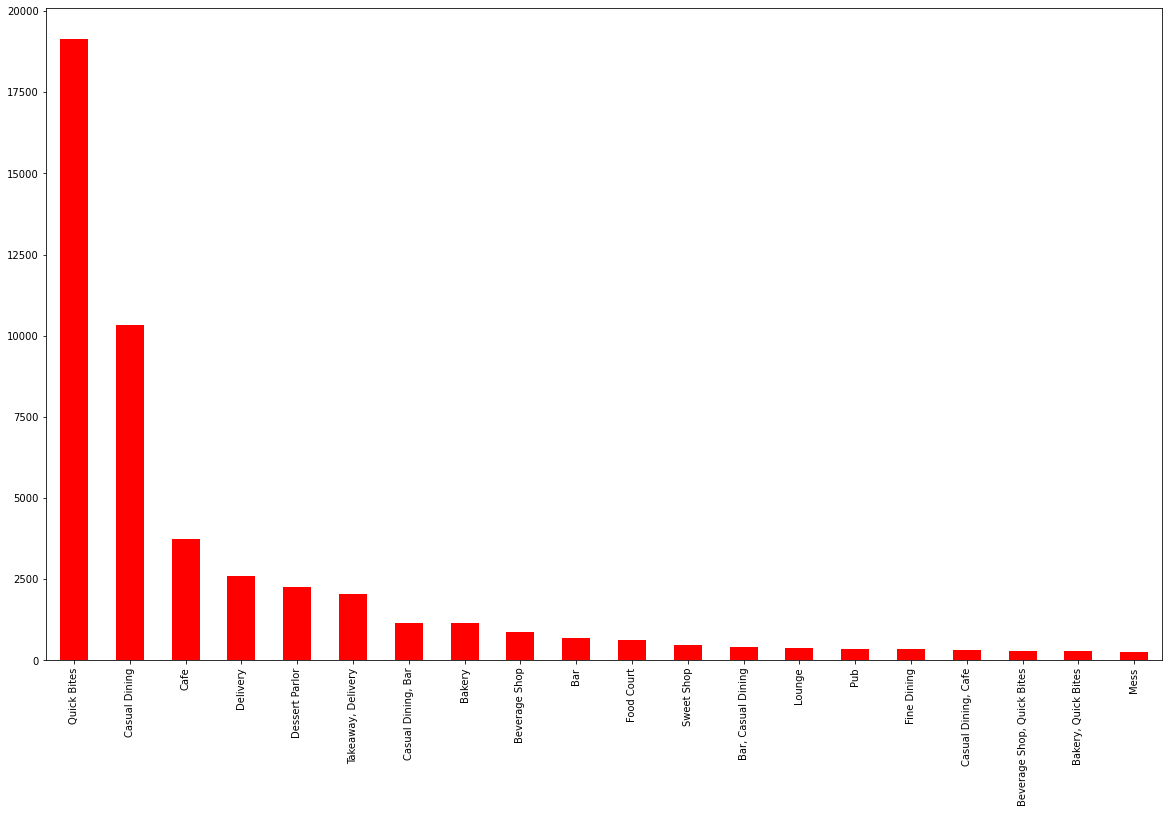

In [ ]:
plt.figure(figsize=(20,12))
df["rest_type"].value_counts().nlargest(20).plot.bar(color="red")

In [ ]:
df["rest_type"].value_counts()

Quick Bites                   19132
Casual Dining                 10330
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
                              ...  
Cafe, Food Court                  2
Dessert Parlor, Food Court        2
Dessert Parlor, Kiosk             2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

In [ ]:
def mark(x):
    if x in ("Quick Bites","Casual Dining"):
        return "Quick Bites+ Casual Dining"
    else:
        return "Others"

In [ ]:
df["Top_types"]=df["rest_type"].apply(mark)

In [ ]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                        800.0   
1     Chinese, North Indian, Thai                        800.0   
2          Cafe, Mexican, Italian                        800.0   
3      South Indian, North Indian                        300.0   
4        North Indian, Rajasthani                        600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)                   Top_types  
0          Buffet    Banashankari  Quick Bites+ Casual Dining  
1          Buffet    Banashankari  Quick Bites+ Casual Dining  
2          Buffet    Banashankari                      Others  
3          Buffet    Banashankari  Quick Bites+ Casual Dining  
4          Buffet    Banashankari  Quick Bites+ Casual Dining

In [ ]:
!pip install plotly 


In [ ]:
import plotly.express as px

In [ ]:
values=df["Top_types"].value_counts().values

In [ ]:
labels=df["Top_types"].value_counts().index

In [ ]:
fig=px.pie(df,names=labels,values=values)
fig.show()

#### *Almost 60% of restaurants are of Casual Dining and Quick Bites*

## Problem Statements:
- A new dataframe that contains the important features of the restaurant(votes, cost and rating)
- Restaurant Overview Analysis

In [ ]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'Top_types'],
      dtype='object')

In [ ]:
df.dtypes

url                             object
address                         object
name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)    float64
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
Top_types                       object
dtype: object

In [ ]:
rest=df.groupby('name').agg({"votes":"sum","url":"count","approx_cost(for two people)": "mean","rate": "mean"}).reset_index()
rest


name  votes  url  \
0                                     #FeelTheROLL     14    2   
1                                       #L-81 Cafe    432    9   
2                                    #Vibes Restro      0    3   
3                                          #refuel    111    3   
4                           'Brahmins' Thatte Idli      0    1   
...                                            ...    ...  ...   
8787                                       late100      0    5   
8788                                       nu.tree   1443    8   
8789  re:cess - Hilton Bangalore Embassy GolfLinks    438    3   
8790                                    repEAT Hub      0    2   
8791                                     sCoolMeal      0    5   

      approx_cost(for two people)      rate  
0                           200.0  3.400000  
1                           400.0  3.900000  
2                           700.0       NaN  
3                           400.0  3.700000  
4                           100.0       NaN  
...                           ...       ...  
8787                        200.0       NaN  
8788                        400.0  4.314286  
8789                       1200.0  4.100000  
8790                        200.0       NaN  
8791                        300.0       NaN  

[8792 rows x 5 columns]

In [ ]:
rest.columns = ["name","total_votes","total_unities","avg_approx_cost","mean_rating"]
rest.head()

name  total_votes  total_unities  avg_approx_cost  \
0            #FeelTheROLL           14              2            200.0   
1              #L-81 Cafe          432              9            400.0   
2           #Vibes Restro            0              3            700.0   
3                 #refuel          111              3            400.0   
4  'Brahmins' Thatte Idli            0              1            100.0   

   mean_rating  
0          3.4  
1          3.9  
2          NaN  
3          3.7  
4          NaN

In [ ]:
rest["votes_per_unity"]=rest["total_votes"]/rest["total_unities"]

In [ ]:
rest.head()

name  total_votes  total_unities  avg_approx_cost  \
0            #FeelTheROLL           14              2            200.0   
1              #L-81 Cafe          432              9            400.0   
2           #Vibes Restro            0              3            700.0   
3                 #refuel          111              3            400.0   
4  'Brahmins' Thatte Idli            0              1            100.0   

   mean_rating  votes_per_unity  
0          3.4              7.0  
1          3.9             48.0  
2          NaN              0.0  
3          3.7             37.0  
4          NaN              0.0

In [ ]:
popular=rest.sort_values(by = "total_unities",ascending=False)
popular

name  total_votes  total_unities  \
1320                   Cafe Coffee Day         3089             96   
5549                            Onesta       347520             85   
3788                         Just Bake         2898             73   
2446                 Empire Restaurant       229808             71   
2577                 Five Star Chicken         3134             70   
...                                ...          ...            ...   
1900                        Cool Break           11              1   
8076       The Shake Factory Originals            8              1   
5216        Nethravathi Military Hotel            0              1   
7426  Swadisht North Indian Restaurant           23              1   
5375                Night Punjabi Folk            0              1   

      avg_approx_cost  mean_rating  votes_per_unity  
1320       844.791667     3.147191        32.177083  
5549       600.000000     4.410588      4088.470588  
3788       400.000000     3.355882        39.698630  
2446       685.211268     3.916901      3236.732394  
2577       257.857143     3.425000        44.771429  
...               ...          ...              ...  
1900       150.000000     3.400000        11.000000  
8076       200.000000     3.300000         8.000000  
5216       200.000000          NaN         0.000000  
7426       200.000000     3.200000        23.000000  
5375       200.000000          NaN         0.000000  

[8792 rows x 6 columns]

In [ ]:
popular.shape

(8792, 6)

In [ ]:
popular["name"].nunique()

8792

### Restaurant Overview Analysis

Text(0.5, 1.0, 'Top 5 Less Voted Restaurants\n(with at least 1 vote)')

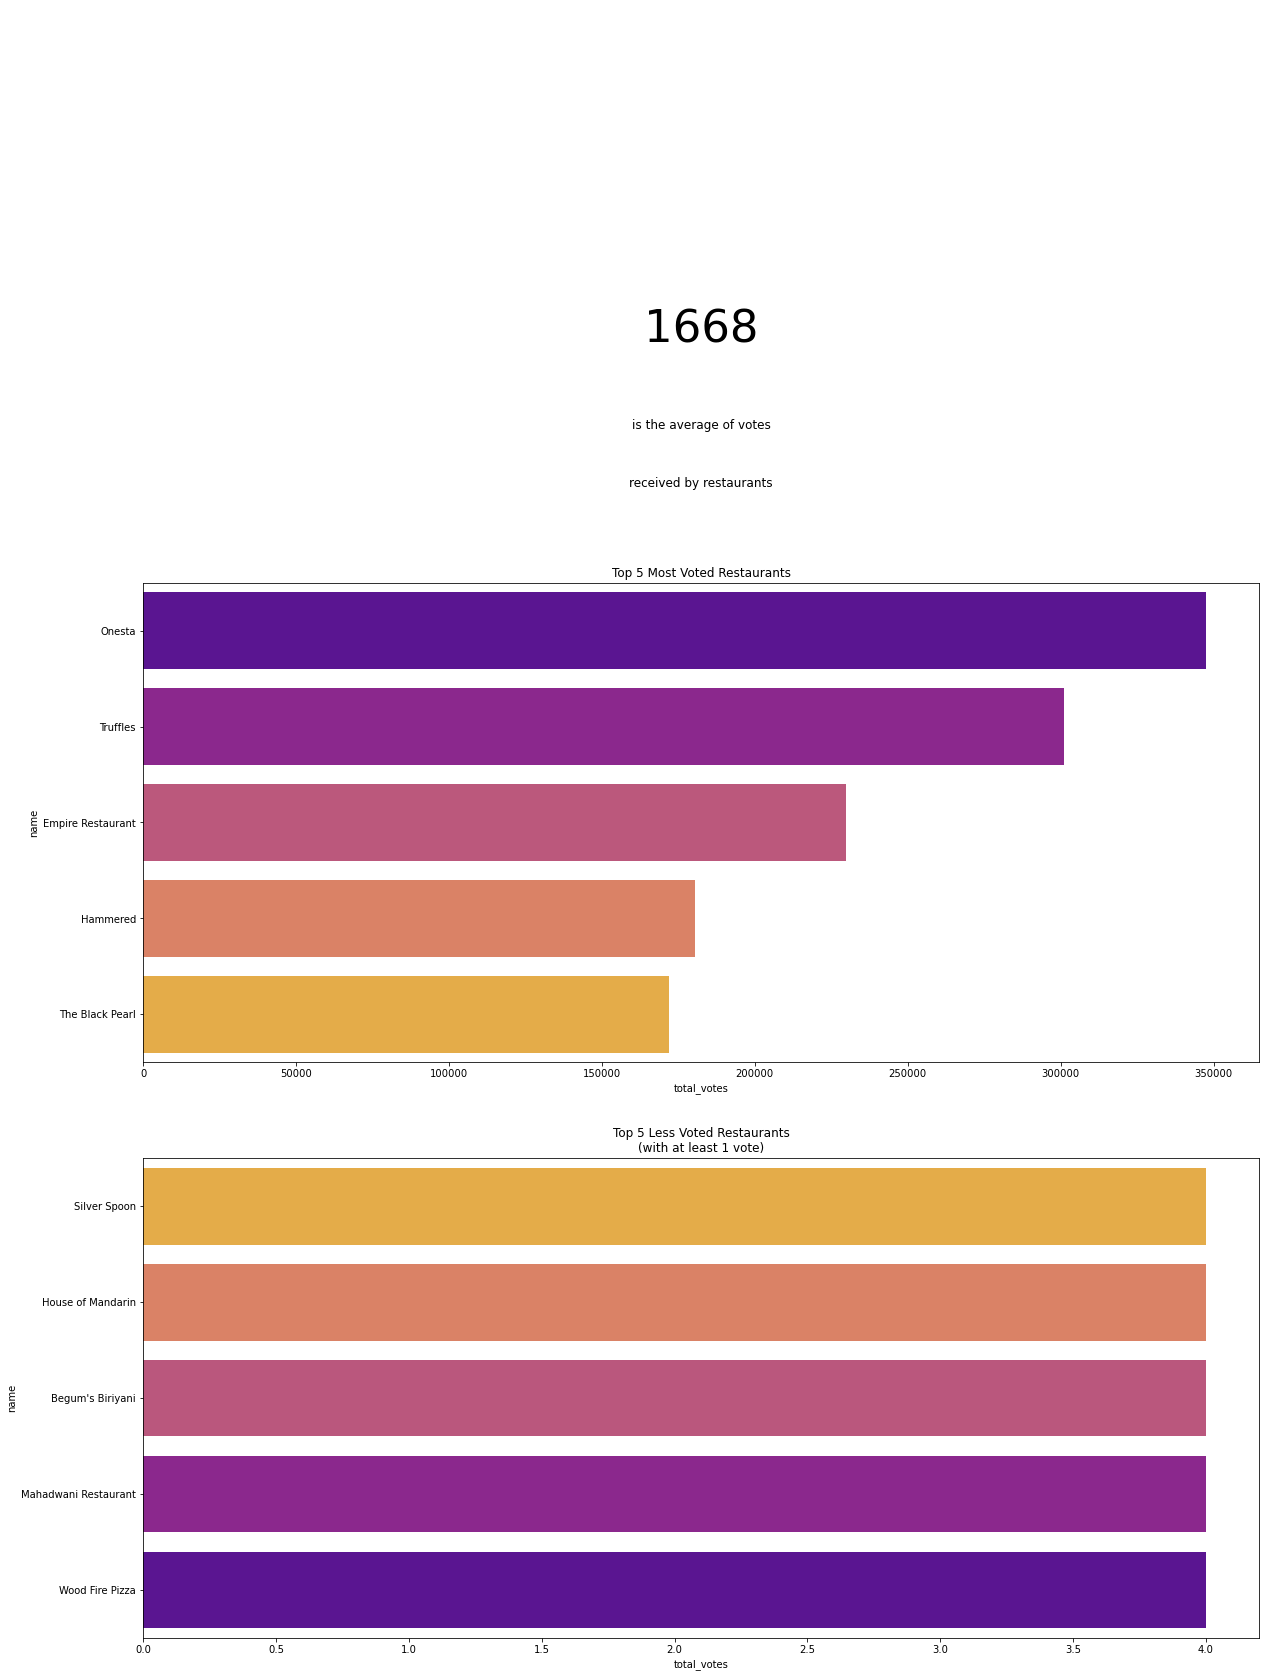

In [ ]:
import seaborn as sns
fig, (ax1,ax2,ax3)= plt.subplots(3,1,figsize=(20,30))

# Most popular restaurants (votes)

ax1.text(0.50, 0.30, int(popular["total_votes"].mean()), fontsize=45, ha='center')
ax1.text(0.50, 0.12, "is the average of votes", fontsize=12, ha='center')
ax1.text(0.50, 0.00, "received by restaurants", fontsize=12, ha='center')
ax1.axis("off")

sns.barplot(x="total_votes", y="name", data=popular.sort_values(by="total_votes", ascending=False)[0:5],ax=ax2, palette='plasma')
ax2.set_title("Top 5 Most Voted Restaurants", size=12)

sns.barplot(x="total_votes", y="name", data=popular.sort_values(by='total_votes', ascending=False).query('total_votes > 0').tail(),ax=ax3, palette='plasma_r')
ax3.set_title("Top 5 Less Voted Restaurants\n(with at least 1 vote)", size=12)


## Problem Statements:
- Analysing Most expensive and cheapest restaurants.
- How many restaurants offer book table and online oder service?
- Finding best budget restaurants in any location.

In [ ]:
popular.columns

Index(['name', 'total_votes', 'total_unities', 'avg_approx_cost',
       'mean_rating', 'votes_per_unity'],
      dtype='object')

In [ ]:
popular.head()

name  total_votes  total_unities  avg_approx_cost  \
1320    Cafe Coffee Day         3089             96       844.791667   
5549             Onesta       347520             85       600.000000   
3788          Just Bake         2898             73       400.000000   
2446  Empire Restaurant       229808             71       685.211268   
2577  Five Star Chicken         3134             70       257.857143   

      mean_rating  votes_per_unity  
1320     3.147191        32.177083  
5549     4.410588      4088.470588  
3788     3.355882        39.698630  
2446     3.916901      3236.732394  
2577     3.425000        44.771429

Text(0.5, 1.0, 'Top 5 Cheapest Restaurants ')

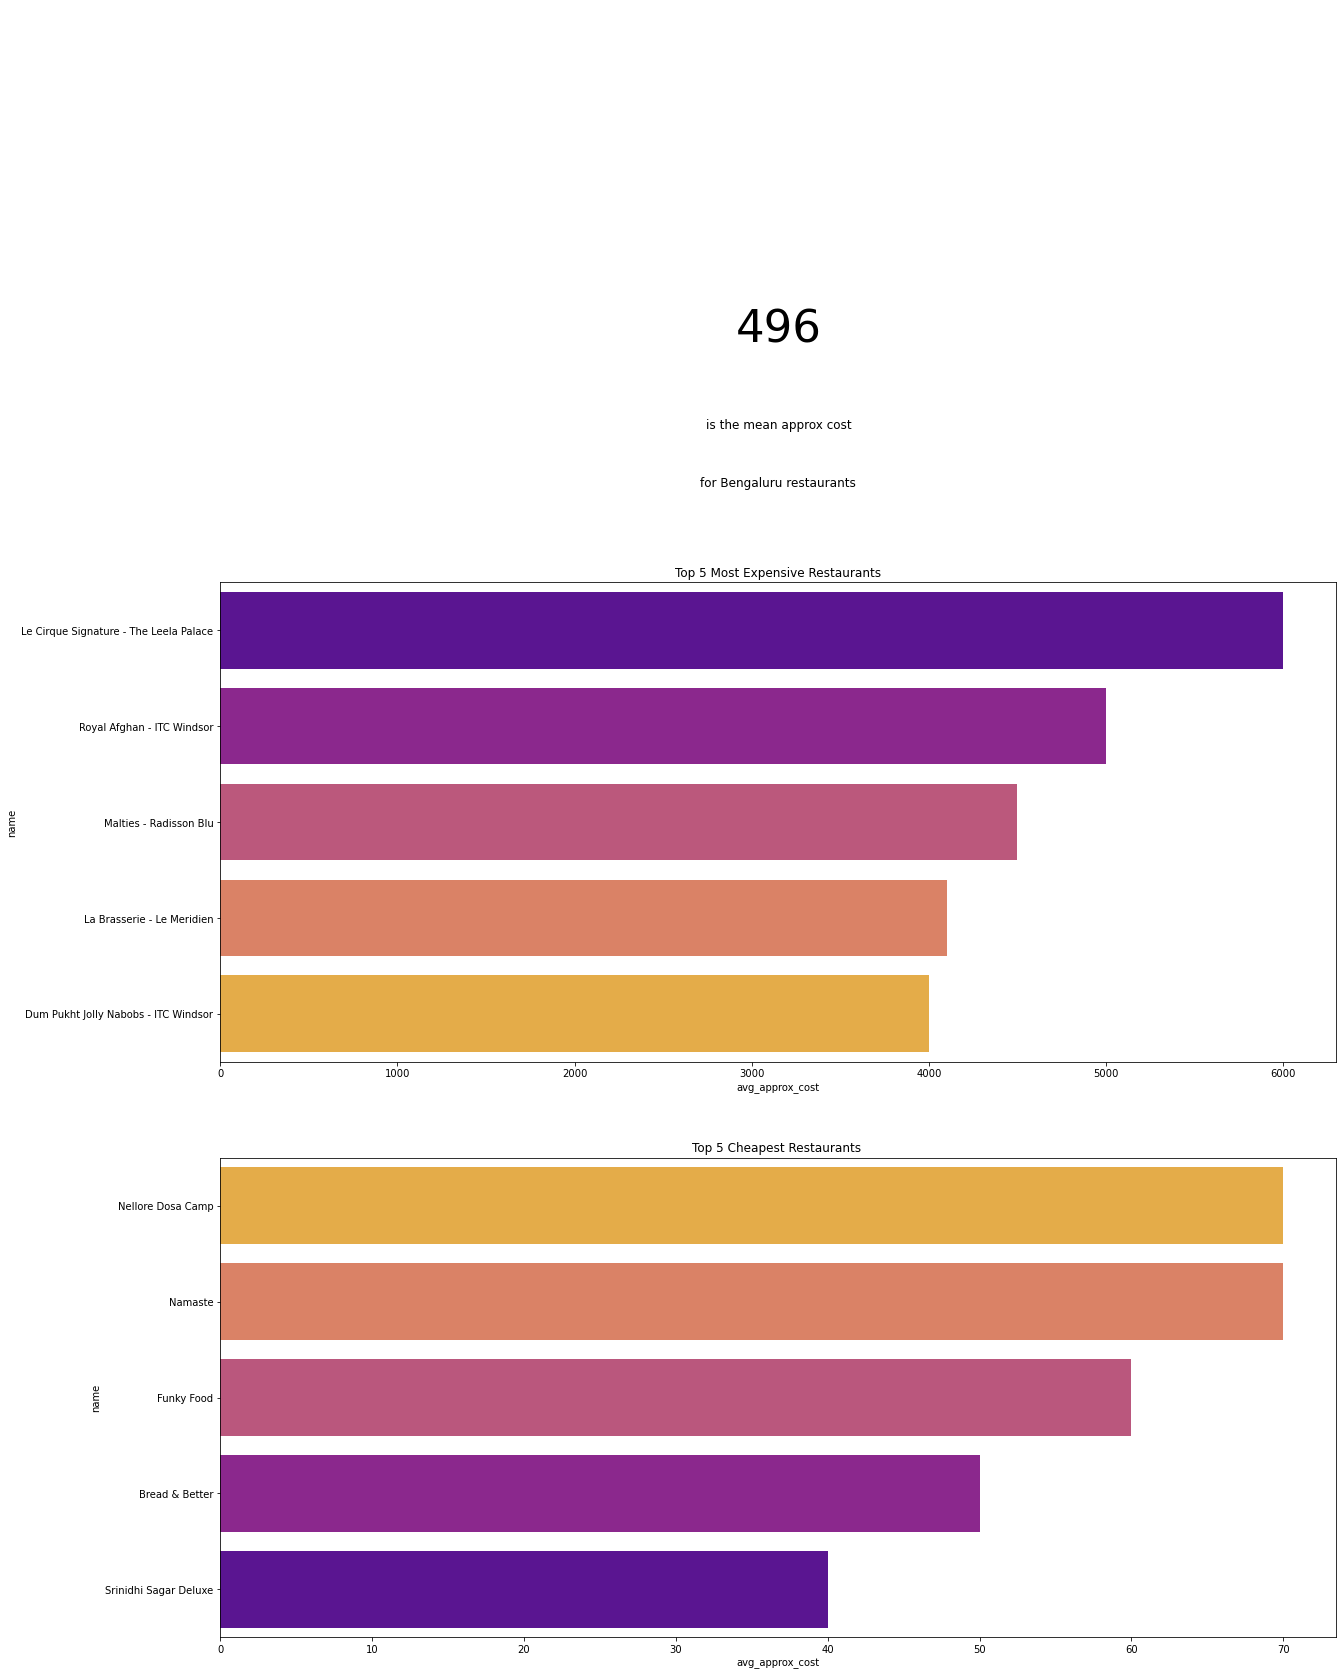

In [ ]:
import seaborn as sns
fig, (ax1,ax2,ax3)= plt.subplots(3,1,figsize=(20,30))
ax1.text(0.50, 0.30, int(popular["avg_approx_cost"].mean()), fontsize=45, ha='center')
ax1.text(0.50, 0.12, "is the mean approx cost", fontsize=12, ha='center')
ax1.text(0.50, 0.00, "for Bengaluru restaurants", fontsize=12, ha='center')
ax1.axis("off")

sns.barplot(x="avg_approx_cost", y="name", data=popular.sort_values(by="avg_approx_cost", ascending=False).query("avg_approx_cost > 0").head(5),ax=ax2,palette="plasma")
ax2.set_title("Top 5 Most Expensive Restaurants")

sns.barplot(x="avg_approx_cost", y="name", data=popular.sort_values(by="avg_approx_cost", ascending=False).query("avg_approx_cost > 0").tail(5),ax=ax3, palette='plasma_r')
ax3.set_title('Top 5 Cheapest Restaurants ', size=12)


### How many restaurants offer Book table service and Online order service?


In [ ]:
x= df["book_table"].value_counts()
labels=["not book","book"]

In [ ]:
import plotly.graph_objs as go 
from plotly.offline import iplot 

In [ ]:
trace= go.Pie(labels=labels,values=x,hoverinfo="label+percent",textinfo="percent")
iplot([trace])

In [ ]:
x= df["online_order"].value_counts()
labels=["accepted","not accepted"]

In [ ]:
fig=px.pie(df,values=x,names=labels,title="Pie chart")
fig.show()

### Finding Best budget Restaurants in any location

In [ ]:
filter= (df["approx_cost(for two people)"]<=400) & (df["location"]=="BTM") & (df["rate"]>=4) & (df["rest_type"]== "Quick Bites")
budget= df[filter]
budget.head()

url  \
928  https://www.zomato.com/bangalore/hiyar-majhe-k...   
934  https://www.zomato.com/bangalore/swadista-aaha...   
940  https://www.zomato.com/bangalore/swad-punjab-d...   
942  https://www.zomato.com/bangalore/roti-wala-btm...   
954  https://www.zomato.com/bangalore/litti-twist-b...   

                                               address                 name  \
928  57/1, Near Alliance University, 19th Cross, 7t...  Hiyar Majhe Kolkata   
934     947, 16th Main Road, 2nd Stage, BTM, Bangalore       Swadista Aahar   
940  324, 23rd Main, 3rd Cross, 2nd Stage, BTM, Ban...       Swad Punjab Da   
942  688, 7th Main, 10th Cross Main Road, 2nd Stage...            Roti Wala   
954  No 43, 7th Main Road, NS Palaya, BTM 2nd Stage...          Litti Twist   

    online_order book_table  rate  votes                               phone  \
928          Yes         No   4.0    244  +91 9108919806\r\r\n+91 9739059571   
934          Yes         No   4.1    775  +91 9844006825\r\r\n+91 9844615361   
940          Yes         No   4.0    126                      +91 8360151853   
942          Yes         No   4.0    197                      +91 9731100002   
954          Yes         No   4.1    464                      +91 8884270523   

    location    rest_type                                         dish_liked  \
928      BTM  Quick Bites  Radhaballavi, Biryani, Egg Noodles, Egg Roll, ...   
934      BTM  Quick Bites  Panneer Butter Masala, Idli, Masala Dosa, Vada...   
940      BTM  Quick Bites    Lassi, Roti, Veg Thali, Aloo Paratha, Egg Curry   
942      BTM  Quick Bites  Gulab Jamun, Buttermilk, Egg Bhurji, Sprout Sa...   
954      BTM  Quick Bites  Litti, Liti Chokha, Lassi, Tea, Paratha, Thali...   

                                             cuisines  \
928                             Bengali, North Indian   
934  South Indian, North Indian, Chinese, Street Food   
940                                      North Indian   
942                                      North Indian   
954                              North Indian, Bihari   

     approx_cost(for two people)  \
928                        400.0   
934                        300.0   
940                        150.0   
942                        300.0   
954                        300.0   

                                          reviews_list  \
928  [('Rated 4.0', 'RATED\n  I like this restauran...   
934  [('Rated 3.0', "RATED\n  Ordered south Indian ...   
940  [('Rated 4.0', 'RATED\n  If you can visit and ...   
942  [('Rated 5.0', 'RATED\n  Well, I never had a c...   
954  [('Rated 4.0', "RATED\n  It's a great outlet t...   

                                             menu_item listed_in(type)  \
928                                                 []        Delivery   
934                                                 []        Delivery   
940  ['Dal with Sabji Combo', 'Dal Sabji with 4 Cha...        Delivery   
942                                                 []        Delivery   
954                                                 []        Delivery   

       listed_in(city)                   Top_types  
928  Bannerghatta Road  Quick Bites+ Casual Dining  
934  Bannerghatta Road  Quick Bites+ Casual Dining  
940  Bannerghatta Road  Quick Bites+ Casual Dining  
942  Bannerghatta Road  Quick Bites+ Casual Dining  
954  Bannerghatta Road  Quick Bites+ Casual Dining

In [ ]:
budget["name"].unique()

array(['Hiyar Majhe Kolkata', 'Swadista Aahar', 'Swad Punjab Da',
       'Roti Wala', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Nanna Munna Paratha House', 'Chaatimes',
       'Andhra Kitchen', "Muthashy's", 'Ashirvaad Grand', 'Petoo',
       'Ilyazsab The House Of Chicken', 'Kannur Food Point',
       "Domino's Pizza", 'KFC', 'Hari Super Sandwich',
       'The Biriyani Pedia', 'World Of Asia'], dtype=object)

In [ ]:
def return_budget(location,restaurant_type):
    filter= (df["approx_cost(for two people)"]<=400) & (df["location"]==location) & (df["rate"]>=4) & (df["rest_type"]== restaurant_type)
    budget= df[filter]
    return (budget["name"].unique())
    

In [ ]:
return_budget("BTM","Quick Bites")

array(['Hiyar Majhe Kolkata', 'Swadista Aahar', 'Swad Punjab Da',
       'Roti Wala', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Nanna Munna Paratha House', 'Chaatimes',
       'Andhra Kitchen', "Muthashy's", 'Ashirvaad Grand', 'Petoo',
       'Ilyazsab The House Of Chicken', 'Kannur Food Point',
       "Domino's Pizza", 'KFC', 'Hari Super Sandwich',
       'The Biriyani Pedia', 'World Of Asia'], dtype=object)

### *Geographical Analysis*

In [ ]:
locations=pd.DataFrame({"Name":df['location'].unique()})
 

In [ ]:
locations['new_Name']='Bangalore '+locations['Name']

In [ ]:
locations.head()

Name                      new_Name
0        Banashankari        Bangalore Banashankari
1        Basavanagudi        Bangalore Basavanagudi
2         Mysore Road         Bangalore Mysore Road
3           Jayanagar           Bangalore Jayanagar
4  Kumaraswamy Layout  Bangalore Kumaraswamy Layout

In [ ]:
!pip install geopy

In [ ]:
from geopy.geocoders import Nominatim

In [ ]:
geolocator= Nominatim(user_agent= "app")

In [ ]:
locations=pd.DataFrame({'Name':df['location'].unique()})
locations

Name
0         Banashankari
1         Basavanagudi
2          Mysore Road
3            Jayanagar
4   Kumaraswamy Layout
..                 ...
89      West Bangalore
90         Magadi Road
91           Yelahanka
92      Sahakara Nagar
93              Peenya

[94 rows x 1 columns]

In [ ]:
lat=[]
lon=[]

for location in locations ["Name"]:
    location=geolocator.geocode(location)
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(location.latitude)
        lon.append(location.longitude)

In [ ]:
locations["latitude"]=lat
locations["longitude"]=lon

In [ ]:
locations.head()

Name   latitude  longitude
0        Banashankari  15.887678  75.704678
1        Basavanagudi  12.941726  77.575502
2         Mysore Road  12.387214  76.666963
3           Jayanagar  27.643927  83.052805
4  Kumaraswamy Layout  12.908149  77.555318

#### *This is used to plot maps*

In [ ]:
Rest_locations=df["location"].value_counts().reset_index()

In [ ]:
Rest_locations.columns=["Name","count"]
Rest_locations

Name  count
0                     BTM   5124
1                     HSR   2523
2   Koramangala 5th Block   2504
3                JP Nagar   2235
4              Whitefield   2144
..                    ...    ...
88              Yelahanka      6
89         West Bangalore      6
90                 Jakkur      3
91   Rajarajeshwari Nagar      2
92                 Peenya      1

[93 rows x 2 columns]

### *Combining both the dataframes*

In [ ]:
Restaurant_locations=Rest_locations.merge(locations,on="Name").dropna()
Restaurant_locations

Name  count   latitude   longitude
0                     BTM   5124  45.954851 -112.496595
1                     HSR   2523  18.147500   41.538889
2   Koramangala 5th Block   2504  12.934377   77.628415
3                JP Nagar   2235  12.265594   76.646540
4              Whitefield   2144  44.373058  -71.611858
..                    ...    ...        ...         ...
88              Yelahanka      6  13.100698   77.596345
89         West Bangalore      6  13.001129   77.632562
90                 Jakkur      3  13.078474   77.606894
91   Rajarajeshwari Nagar      2  12.927441   77.515522
92                 Peenya      1  13.032942   77.527325

[92 rows x 4 columns]

In [ ]:
!pip install folium 

In [ ]:
import folium 
from folium.plugins import HeatMap

In [ ]:
basemap=folium.Map(location=[12.97,77.59])
basemap

### *Heatmap of Restaurant*

In [ ]:
HeatMap(data=Restaurant_locations[["latitude","longitude","count"]]).add_to(basemap)

In [ ]:
basemap

#### *It is clear that restaurants tend to concentrate in Central Bangalore area*

## Problem Statements:
- Analysing Customer Preference.
- Analysing Reviews of Particular Restaurant

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
data=df[df["rest_type"]=="Quick Bites"]
data.head()

url  \
3   https://www.zomato.com/bangalore/addhuri-udupi...   
31  https://www.zomato.com/bangalore/foodiction-1-...   
34  https://www.zomato.com/bangalore/faasos-banash...   
36  https://www.zomato.com/bangalore/fast-and-fres...   
39  https://www.zomato.com/bangalore/maruthi-davan...   

                                              address  \
3   1st Floor, Annakuteera, 3rd Stage, Banashankar...   
31  2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...   
34  80, BDA Complex, 2nd Stage, Banashankari, Bang...   
36  32, 7th Main Road, Dwaraka Nagar,Near PES Coll...   
39  556/A, Water Tank Road, 3rd Stage, Banashankar...   

                            name online_order book_table  rate  votes  \
3          Addhuri Udupi Bhojana           No         No   3.7     88   
31                    Foodiction          Yes         No   2.8    506   
34                        Faasos          Yes         No   4.2    415   
36                Fast And Fresh          Yes         No   2.8     91   
39  Maruthi Davangere Benne Dosa          Yes         No   4.0     17   

             phone      location    rest_type  \
3   +91 9620009302  Banashankari  Quick Bites   
31  +91 9916107070  Banashankari  Quick Bites   
34  +91 7700020020  Banashankari  Quick Bites   
36  +91 9742974232  Banashankari  Quick Bites   
39  +91 9019563485  Banashankari  Quick Bites   

                                           dish_liked  \
3                                         Masala Dosa   
31  Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...   
34  Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...   
36                                                NaN   
39                                                NaN   

                                    cuisines  approx_cost(for two people)  \
3                 South Indian, North Indian                        300.0   
31  North Indian, Fast Food, Chinese, Burger                        500.0   
34          North Indian, Biryani, Fast Food                        500.0   
36          North Indian, Chinese, Fast Food                        400.0   
39                              South Indian                        150.0   

                                         reviews_list  \
3   [('Rated 4.0', "RATED\n  Great food and proper...   
31  [('Rated 1.0', "RATED\n  Worst restaurant ever...   
34  [('Rated 3.0', 'RATED\n  Not worth for the mon...   
36  [('Rated 1.0', 'RATED\n  Half baked rice in a ...   
39  [('Rated 5.0', "RATED\n  This restaurant serve...   

                                            menu_item listed_in(type)  \
3                                                  []          Buffet   
31                                                 []        Delivery   
34  ['Chole Kulcha Meal', 'Upvas Aloo Paratha With...        Delivery   
36                                                 []        Delivery   
39  ['Benne Dosa', 'Benne Masala Dosa', 'Benne Kal...        Delivery   

   listed_in(city)                   Top_types  
3     Banashankari  Quick Bites+ Casual Dining  
31    Banashankari  Quick Bites+ Casual Dining  
34    Banashankari  Quick Bites+ Casual Dining  
36    Banashankari  Quick Bites+ Casual Dining  
39    Banashankari  Quick Bites+ Casual Dining

In [ ]:
dishes=" "

for word in data["dish_liked"].dropna():
    words=word.split()
    for i in range(len(words)):
        words[i]= words[i].lower()
    dishes=dishes+" ".join(words)+" "

In [ ]:
dishes

' masala dosa burgers, lassi, chicken grill, naan, momos, chicken burger, biryani rolls, veggie wrap, chocolate fantasy, rice bowls, chicken rice, paneer makhanwala, chicken tikka wrap dabeli, faluda, masala poori, sandwiches, tokri chaat, pav bhaji, dahipuri burgers, fries, hot chocolate pane pizza, lava cake, pasta, stuffed garlic bread, chocolava cake, tacos biryani paratha, pasta pasta, momos, rolls, chicken roll, chilli chicken, paneer roll, spaghetti grape juice, chicken grill, chicken tikka roll, shawarma roll, chicken shawarama, biryani combo, rolls vegetable biryani, ginger chicken, chicken biryani, donne biryani, chicken kebab, egg bhurji, dum biryani rolls, momos, fries, veggie roll, chicken kebab roll, paneer roll, cheese roll benne dosa, mirchi bajji, filter coffee, poha, tea, butter dosa, crispy dosa masala dosa panipuri, chaat, noodles, dahi bhalle rooftop ambience coffee, tea, kesari bath, open dosa, vada, idli, bread dosa masala dosa, tirupathi pongal, filter coffee, v

In [ ]:
stopwords=set(STOPWORDS)

In [ ]:
wordcloud=WordCloud(stopwords=stopwords,width=1500,height=1500).generate(dishes)

(-0.5, 1499.5, 1499.5, -0.5)

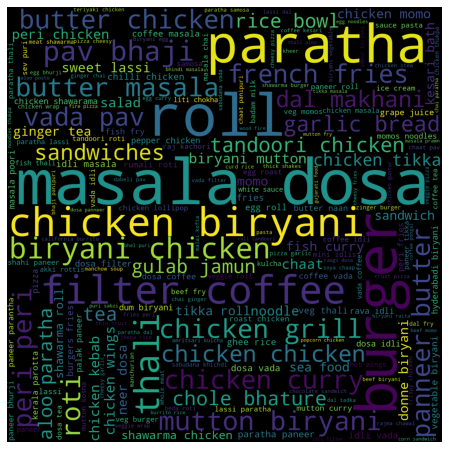

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")

### Analysing Reviews of a Particular Restaurant

In [ ]:
data=df["reviews_list"][0]
data

'[(\'Rated 4.0\', \'RATED\\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.\'), (\'Rated 4.0\', \'RATED\\n  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\\nCheers\'), (\'Rated 2.0\', \'RATED\\n  Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said this plac

In [ ]:
data=data.lower()

In [ ]:
import re

In [ ]:
data2= re.sub("[^a-zA-z]"," ",data)
data2

'[  rated        rated\\n  a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again       rated        rated\\n  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrangement are good too  we ordered masala papad  panner and baby corn starters  lemon and corrionder soup  butter roti  olive and chilli paratha  food was fresh and good  service is good too  good for family hangout \\ncheers      rated        rated\\n  its a restaurant near to banashankari bda  me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet  on inquiring they said this place is mostly

In [ ]:
data3=re.sub("rated"," ",data2)
data3

'[            \\n  a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again                 \\n  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrangement are good too  we ordered masala papad  panner and baby corn starters  lemon and corrionder soup  butter roti  olive and chilli paratha  food was fresh and good  service is good too  good for family hangout \\ncheers                \\n  its a restaurant near to banashankari bda  me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet  on inquiring they said this place is mostly visited by vegetarians 

In [ ]:
data4=re.sub("x"," ",data3)
data4

'[            \\n  a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again                 \\n  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrangement are good too  we ordered masala papad  panner and baby corn starters  lemon and corrionder soup  butter roti  olive and chilli paratha  food was fresh and good  service is good too  good for family hangout \\ncheers                \\n  its a restaurant near to banashankari bda  me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet  on inquiring they said this place is mostly visited by vegetarians 

In [ ]:
data5=re.sub(" +"," ",data4)
data5

'[ \\n a beautiful place to dine in the interiors take you back to the mughal era the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again \\n i was here for dinner with my family on a weekday the restaurant was completely empty ambience is good with some good old hindi music seating arrangement are good too we ordered masala papad panner and baby corn starters lemon and corrionder soup butter roti olive and chilli paratha food was fresh and good service is good too good for family hangout \\ncheers \\n its a restaurant near to banashankari bda me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet on inquiring they said this place is mostly visited by vegetarians anyways we ordered ala carte items which took ages to come f

In [ ]:
dataset=df[df["rest_type"]=="Quick Bites"]

In [ ]:
dataset.head()

url  \
3   https://www.zomato.com/bangalore/addhuri-udupi...   
31  https://www.zomato.com/bangalore/foodiction-1-...   
34  https://www.zomato.com/bangalore/faasos-banash...   
36  https://www.zomato.com/bangalore/fast-and-fres...   
39  https://www.zomato.com/bangalore/maruthi-davan...   

                                              address  \
3   1st Floor, Annakuteera, 3rd Stage, Banashankar...   
31  2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...   
34  80, BDA Complex, 2nd Stage, Banashankari, Bang...   
36  32, 7th Main Road, Dwaraka Nagar,Near PES Coll...   
39  556/A, Water Tank Road, 3rd Stage, Banashankar...   

                            name online_order book_table  rate  votes  \
3          Addhuri Udupi Bhojana           No         No   3.7     88   
31                    Foodiction          Yes         No   2.8    506   
34                        Faasos          Yes         No   4.2    415   
36                Fast And Fresh          Yes         No   2.8     91   
39  Maruthi Davangere Benne Dosa          Yes         No   4.0     17   

             phone      location    rest_type  \
3   +91 9620009302  Banashankari  Quick Bites   
31  +91 9916107070  Banashankari  Quick Bites   
34  +91 7700020020  Banashankari  Quick Bites   
36  +91 9742974232  Banashankari  Quick Bites   
39  +91 9019563485  Banashankari  Quick Bites   

                                           dish_liked  \
3                                         Masala Dosa   
31  Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...   
34  Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...   
36                                                NaN   
39                                                NaN   

                                    cuisines  approx_cost(for two people)  \
3                 South Indian, North Indian                        300.0   
31  North Indian, Fast Food, Chinese, Burger                        500.0   
34          North Indian, Biryani, Fast Food                        500.0   
36          North Indian, Chinese, Fast Food                        400.0   
39                              South Indian                        150.0   

                                         reviews_list  \
3   [('Rated 4.0', "RATED\n  Great food and proper...   
31  [('Rated 1.0', "RATED\n  Worst restaurant ever...   
34  [('Rated 3.0', 'RATED\n  Not worth for the mon...   
36  [('Rated 1.0', 'RATED\n  Half baked rice in a ...   
39  [('Rated 5.0', "RATED\n  This restaurant serve...   

                                            menu_item listed_in(type)  \
3                                                  []          Buffet   
31                                                 []        Delivery   
34  ['Chole Kulcha Meal', 'Upvas Aloo Paratha With...        Delivery   
36                                                 []        Delivery   
39  ['Benne Dosa', 'Benne Masala Dosa', 'Benne Kal...        Delivery   

   listed_in(city)                   Top_types  
3     Banashankari  Quick Bites+ Casual Dining  
31    Banashankari  Quick Bites+ Casual Dining  
34    Banashankari  Quick Bites+ Casual Dining  
36    Banashankari  Quick Bites+ Casual Dining  
39    Banashankari  Quick Bites+ Casual Dining

In [ ]:
#Remove multiple spaces 

total_review=" "
for review in dataset["reviews_list"]:
    review=review.lower()
    review=re.sub("[^a-zA-Z]", " ",review)
    review=re.sub("rated", " ",review)
    review=re.sub("x"," ",review)
    review=re.sub(" +"," ",review)
    total_review=total_review + str(review)
 

In [ ]:
wordcloud2=WordCloud(stopwords=stopwords,width=1500,height=1500).generate(total_review)

(-0.5, 1499.5, 1499.5, -0.5)

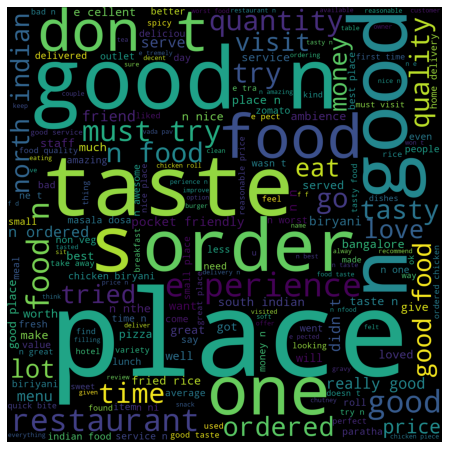

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(wordcloud2)
plt.axis("off")

## Problem Statements:
- Preparing data for modelling purpose.
- Creating a target variable 

In [ ]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'Top_types'],
      dtype='object')

In [ ]:
# Splitting the restaurants

In [ ]:
def assign(x):
    if x>0:
        return 1
    else:
        return 0 

In [ ]:
df["rated"]=df["rate"].apply(assign)

In [ ]:
df["rated"].unique()

array([1, 0], dtype=int64)

In [ ]:
new_restaurants=df[df["rated"]==0]
train_val_restaurants=df.query("rated==1")

#### *By now the original dataset is splitted into two new datafarames:*
1. new_restaurants 
2. train_val_restaurants

In [ ]:
train_val_restaurants.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                        800.0   
1     Chinese, North Indian, Thai                        800.0   
2          Cafe, Mexican, Italian                        800.0   
3      South Indian, North Indian                        300.0   
4        North Indian, Rajasthani                        600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)                   Top_types  rated  
0          Buffet    Banashankari  Quick Bites+ Casual Dining      1  
1          Buffet    Banashankari  Quick Bites+ Casual Dining      1  
2          Buffet    Banashankari                      Others      1  
3          Buffet    Banashankari  Quick Bites+ Casual Dining      1  
4          Buffet    Banashankari  Quick Bites+ Casual Dining      1

In [ ]:
train_val_restaurants["rate"].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [ ]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'Top_types', 'rated'],
      dtype='object')

#### *Defining a custom threshold value that split the data according to Good and bad restaurants*

In [ ]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:
threshold=3.75
train_val_restaurants["target"]=train_val_restaurants["rate"].apply(lambda x:1 if x>=threshold else 0)

In [ ]:
train_val_restaurants.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                        800.0   
1     Chinese, North Indian, Thai                        800.0   
2          Cafe, Mexican, Italian                        800.0   
3      South Indian, North Indian                        300.0   
4        North Indian, Rajasthani                        600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)                   Top_types  rated  target  
0          Buffet    Banashankari  Quick Bites+ Casual Dining      1       1  
1          Buffet    Banashankari  Quick Bites+ Casual Dining      1       1  
2          Buffet    Banashankari                      Others      1       1  
3          Buffet    Banashankari  Quick Bites+ Casual Dining      1       0  
4          Buffet    Banashankari  Quick Bites+ Casual Dining      1       1

In [ ]:
x=train_val_restaurants["target"].value_counts()
x

0    21421
1    20244
Name: target, dtype: int64

In [ ]:
labels=x.index
labels

Int64Index([0, 1], dtype='int64')

([<matplotlib.patches.Wedge at 0x130dbc6c670>,
 [Text(-0.04879500100763322, 1.0989172161162393, '0'),
  Text(0.04879500100763285, -1.0989172161162393, '1')])

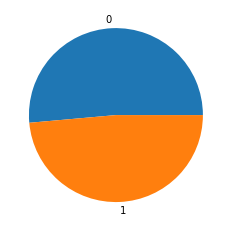

In [ ]:
plt.pie(x,labels=labels) ##This shows No imbalace 

## Problem Statement:
- Perform feature extraction or importance on data

In [ ]:
train_val_restaurants.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'Top_types', 'rated', 'target'],
      dtype='object')

In [ ]:
train_val_restaurants.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                        800.0   
1     Chinese, North Indian, Thai                        800.0   
2          Cafe, Mexican, Italian                        800.0   
3      South Indian, North Indian                        300.0   
4        North Indian, Rajasthani                        600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)                   Top_types  rated  target  
0          Buffet    Banashankari  Quick Bites+ Casual Dining      1       1  
1          Buffet    Banashankari  Quick Bites+ Casual Dining      1       1  
2          Buffet    Banashankari                      Others      1       1  
3          Buffet    Banashankari  Quick Bites+ Casual Dining      1       0  
4          Buffet    Banashankari  Quick Bites+ Casual Dining      1       1

In [ ]:
len(train_val_restaurants["cuisines"][0].split(","))

3

In [ ]:
def count(x):
    return len(x.split(","))

In [ ]:
####Since the data contains NAN values therefore I converted it into str and applied the fucntion
train_val_restaurants["total_cuisines"]=train_val_restaurants["cuisines"].astype(str).apply(count)

In [ ]:
train_val_restaurants["multiple_types"]=train_val_restaurants["rest_type"].astype(str).apply(count)
                    

In [ ]:
train_val_restaurants.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  ... approx_cost(for two people)  \
0  Banashankari        Casual Dining  ...                       800.0   
1  Banashankari        Casual Dining  ...                       800.0   
2  Banashankari  Cafe, Casual Dining  ...                       800.0   
3  Banashankari          Quick Bites  ...                       300.0   
4  Basavanagudi        Casual Dining  ...                       600.0   

                                        reviews_list  menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...         []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...         []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...         []   
3  [('Rated 4.0', "RATED\n  Great food and proper...         []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...         []   

  listed_in(type) listed_in(city)                   Top_types rated target  \
0          Buffet    Banashankari  Quick Bites+ Casual Dining     1      1   
1          Buffet    Banashankari  Quick Bites+ Casual Dining     1      1   
2          Buffet    Banashankari                      Others     1      1   
3          Buffet    Banashankari  Quick Bites+ Casual Dining     1      0   
4          Buffet    Banashankari  Quick Bites+ Casual Dining     1      1   

   total_cuisines  multiple_types  
0               3               1  
1               3               1  
2               3               2  
3               2               1  
4               2               1  

[5 rows x 22 columns]

In [ ]:
train_val_restaurants.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'Top_types', 'rated', 'target',
       'total_cuisines', 'multiple_types'],
      dtype='object')

In [ ]:
imp_features=['online_order', 'book_table', 'location', 'rest_type', 
       'approx_cost(for two people)',
       'listed_in(type)', 'listed_in(city)','target',
       'total_cuisines', 'multiple_types']

In [ ]:
data=train_val_restaurants[imp_features]

In [ ]:
data.shape

(41665, 10)

In [ ]:
data.head()

online_order book_table      location            rest_type  \
0          Yes        Yes  Banashankari        Casual Dining   
1          Yes         No  Banashankari        Casual Dining   
2          Yes         No  Banashankari  Cafe, Casual Dining   
3           No         No  Banashankari          Quick Bites   
4           No         No  Basavanagudi        Casual Dining   

   approx_cost(for two people) listed_in(type) listed_in(city)  target  \
0                        800.0          Buffet    Banashankari       1   
1                        800.0          Buffet    Banashankari       1   
2                        800.0          Buffet    Banashankari       1   
3                        300.0          Buffet    Banashankari       0   
4                        600.0          Buffet    Banashankari       1   

   total_cuisines  multiple_types  
0               3               1  
1               3               1  
2               3               2  
3               2               1  
4               2               1

## Problem Statements:
- Come across with the missing vales
- Separating the categorical and numerical data

In [ ]:
data.isnull().sum()

online_order                     0
book_table                       0
location                         0
rest_type                      149
approx_cost(for two people)    247
listed_in(type)                  0
listed_in(city)                  0
target                           0
total_cuisines                   0
multiple_types                   0
dtype: int64

In [ ]:
data.dropna(how="any",inplace=True)

In [ ]:
data.shape

(41271, 10)

In [ ]:
data.dtypes

online_order                    object
book_table                      object
location                        object
rest_type                       object
approx_cost(for two people)    float64
listed_in(type)                 object
listed_in(city)                 object
target                           int64
total_cuisines                   int64
multiple_types                   int64
dtype: object

In [ ]:
# Splitting features by data type 
cat_features= [col for col in data.columns if data[col].dtype == 'O']


In [ ]:
cat_features

['online_order',
 'book_table',
 'location',
 'rest_type',
 'listed_in(type)',
 'listed_in(city)']

In [ ]:
num_features= [col for col in data.columns if data[col].dtype != 'O']
num_features

['approx_cost(for two people)', 'target', 'total_cuisines', 'multiple_types']

In [ ]:
for feature in cat_features:
    print("{} has total {} unique features".format(feature,data[feature].nunique()))

online_order has total 2 unique features
book_table has total 2 unique features
location has total 92 unique features
rest_type has total 87 unique features
listed_in(type) has total 7 unique features
listed_in(city) has total 30 unique features


## Problem Statement:

- Perform feature encoding on the data



In [ ]:
data[cat_features].head()

online_order book_table      location            rest_type listed_in(type)  \
0          Yes        Yes  Banashankari        Casual Dining          Buffet   
1          Yes         No  Banashankari        Casual Dining          Buffet   
2          Yes         No  Banashankari  Cafe, Casual Dining          Buffet   
3           No         No  Banashankari          Quick Bites          Buffet   
4           No         No  Basavanagudi        Casual Dining          Buffet   

  listed_in(city)  
0    Banashankari  
1    Banashankari  
2    Banashankari  
3    Banashankari  
4    Banashankari

In [ ]:
data["location"].nunique()

92

####  *We will observe that we have many categories, Therefore we cannot use One-Hot Encoding since it will consume more memory in our system* 


In [ ]:
cols=['location','rest_type','listed_in(city)']
for col in cols:
    print('Total feature in {} are {}'.format(col,data[col].nunique()))
    print(data[col].value_counts()/(len(data))*100)
    print('\n')

Total feature in location are 92
BTM                      9.398851
Koramangala 5th Block    5.565651
HSR                      4.829057
Indiranagar              4.361416
JP Nagar                 4.143345
                           ...   
Yelahanka                0.009692
West Bangalore           0.007269
Rajarajeshwari Nagar     0.004846
Nagarbhavi               0.002423
Peenya                   0.002423
Name: location, Length: 92, dtype: float64


Total feature in rest_type are 87
Quick Bites                   33.643478
Casual Dining                 23.299654
Cafe                           8.163117
Dessert Parlor                 4.482566
Delivery                       4.048848
                                ...    
Bakery, Food Court             0.004846
Food Court, Beverage Shop      0.004846
Dessert Parlor, Food Court     0.004846
Bakery, Beverage Shop          0.002423
Quick Bites, Kiosk             0.002423
Name: rest_type, Length: 87, dtype: float64


Total feature in listed_in(c

In [ ]:
values=(data["location"].value_counts()/len(data))*100
values

BTM                      9.398851
Koramangala 5th Block    5.565651
HSR                      4.829057
Indiranagar              4.361416
JP Nagar                 4.143345
                           ...   
Yelahanka                0.009692
West Bangalore           0.007269
Rajarajeshwari Nagar     0.004846
Nagarbhavi               0.002423
Peenya                   0.002423
Name: location, Length: 92, dtype: float64

In [ ]:
## contribution less than 0.4 
##other 
threshold=0.4
imp=values[values>threshold]
imp

BTM                      9.398851
Koramangala 5th Block    5.565651
HSR                      4.829057
Indiranagar              4.361416
JP Nagar                 4.143345
Jayanagar                3.959197
Whitefield               3.808970
Marathahalli             3.416443
Bannerghatta Road        2.970609
Koramangala 7th Block    2.556274
Koramangala 6th Block    2.553851
Brigade Road             2.549005
Bellandur                2.415740
Sarjapur Road            2.069250
Koramangala 1st Block    2.064404
Ulsoor                   2.057135
Koramangala 4th Block    2.037750
Electronic City          2.020789
MG Road                  1.921446
Banashankari             1.802719
Kalyan Nagar             1.681568
Malleshwaram             1.553149
Residency Road           1.463497
Richmond Road            1.463497
Basavanagudi             1.441690
Frazer Town              1.371423
Church Street            1.322963
Brookefield              1.315694
New BEL Road             1.226042
Kammanahalli  

In [ ]:
imp.index

Index(['BTM', 'Koramangala 5th Block', 'HSR', 'Indiranagar', 'JP Nagar',
       'Jayanagar', 'Whitefield', 'Marathahalli', 'Bannerghatta Road',
       'Koramangala 7th Block', 'Koramangala 6th Block', 'Brigade Road',
       'Bellandur', 'Sarjapur Road', 'Koramangala 1st Block', 'Ulsoor',
       'Koramangala 4th Block', 'Electronic City', 'MG Road', 'Banashankari',
       'Kalyan Nagar', 'Malleshwaram', 'Residency Road', 'Richmond Road',
       'Basavanagudi', 'Frazer Town', 'Church Street', 'Brookefield',
       'New BEL Road', 'Kammanahalli', 'Lavelle Road', 'Cunningham Road',
       'Banaswadi', 'Rajajinagar', 'Domlur', 'Shanti Nagar',
       'Old Airport Road', 'St. Marks Road', 'Shivajinagar',
       'Commercial Street', 'Ejipura', 'Jeevan Bhima Nagar', 'Vasanth Nagar',
       'Koramangala 8th Block', 'Koramangala 3rd Block', 'Wilson Garden'],
      dtype='object')

In [ ]:
imp.nunique()

45

In [ ]:
data["location"].nunique()

92

In [ ]:
data["location"]=np.where(data["location"].isin(imp.index),data["location"],"other")

In [ ]:
data["location"].nunique()

47

In [ ]:
values2=(data["rest_type"].value_counts()/len(data))*100
values2

Quick Bites                   33.643478
Casual Dining                 23.299654
Cafe                           8.163117
Dessert Parlor                 4.482566
Delivery                       4.048848
                                ...    
Bakery, Food Court             0.004846
Food Court, Beverage Shop      0.004846
Dessert Parlor, Food Court     0.004846
Bakery, Beverage Shop          0.002423
Quick Bites, Kiosk             0.002423
Name: rest_type, Length: 87, dtype: float64

In [ ]:
threshold=1.5

imp2=values2[values2>threshold]
imp2

Quick Bites           33.643478
Casual Dining         23.299654
Cafe                   8.163117
Dessert Parlor         4.482566
Delivery               4.048848
Takeaway, Delivery     3.099028
Casual Dining, Bar     2.645926
Bakery                 1.705798
Beverage Shop          1.555572
Bar                    1.550726
Name: rest_type, dtype: float64

In [ ]:
imp2.index

Index(['Quick Bites', 'Casual Dining', 'Cafe', 'Dessert Parlor', 'Delivery',
       'Takeaway, Delivery', 'Casual Dining, Bar', 'Bakery', 'Beverage Shop',
       'Bar'],
      dtype='object')

In [ ]:
data["rest_type"].isin(imp2.index)

0         True
1         True
2        False
3         True
4         True
         ...  
51709     True
51711     True
51712     True
51715     True
51716    False
Name: rest_type, Length: 41271, dtype: bool

In [ ]:
data["rest_type"]=np.where(data["rest_type"].isin(imp2.index),data["rest_type"],"other")

In [ ]:
data["rest_type"]

0             Casual Dining
1             Casual Dining
2                     other
3               Quick Bites
4             Casual Dining
                ...        
51709    Casual Dining, Bar
51711    Casual Dining, Bar
51712                   Bar
51715                   Bar
51716                 other
Name: rest_type, Length: 41271, dtype: object

In [ ]:
for feature in cat_features:
    print("{} has total {} unique features".format(feature,data[feature].nunique()))

online_order has total 2 unique features
book_table has total 2 unique features
location has total 47 unique features
rest_type has total 11 unique features
listed_in(type) has total 7 unique features
listed_in(city) has total 30 unique features


In [ ]:
cat_features

['online_order',
 'book_table',
 'location',
 'rest_type',
 'listed_in(type)',
 'listed_in(city)']

In [ ]:
import pandas as pd 
data_cat=data[cat_features]
for col in cat_features:
    col_encoded=pd.get_dummies(data_cat[col],prefix=col,drop_first=True)
    data_cat=pd.concat([data_cat,col_encoded],axis=1)
    data_cat.drop(col,axis=1,inplace=True)

In [ ]:
data_cat.shape

(41271, 93)

In [ ]:
data_cat.head()

online_order_Yes  book_table_Yes  location_Banashankari  \
0                 1               1                      1   
1                 1               0                      1   
2                 1               0                      1   
3                 0               0                      1   
4                 0               0                      0   

   location_Banaswadi  location_Bannerghatta Road  location_Basavanagudi  \
0                   0                           0                      0   
1                   0                           0                      0   
2                   0                           0                      0   
3                   0                           0                      0   
4                   0                           0                      1   

   location_Bellandur  location_Brigade Road  location_Brookefield  \
0                   0                      0                     0   
1                   0                      0                     0   
2                   0                      0                     0   
3                   0                      0                     0   
4                   0                      0                     0   

   location_Church Street  ...  listed_in(city)_Lavelle Road  \
0                       0  ...                             0   
1                       0  ...                             0   
2                       0  ...                             0   
3                       0  ...                             0   
4                       0  ...                             0   

   listed_in(city)_MG Road  listed_in(city)_Malleshwaram  \
0                        0                             0   
1                        0                             0   
2                        0                             0   
3                        0                             0   
4                        0                             0   

   listed_in(city)_Marathahalli  listed_in(city)_New BEL Road  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   listed_in(city)_Old Airport Road  listed_in(city)_Rajajinagar  \
0                                 0                            0   
1                                 0                            0   
2                                 0                            0   
3                                 0                            0   
4                                 0                            0   

   listed_in(city)_Residency Road  listed_in(city)_Sarjapur Road  \
0                               0                              0   
1                               0                              0   
2                               0                              0   
3                               0                              0   
4                               0                              0   

   listed_in(city)_Whitefield  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0  

[5 rows x 93 columns]

## Problem Statements:
- Data for the modelling purpose
- Apply Random Forest on the data

In [ ]:
num_features

['approx_cost(for two people)', 'target', 'total_cuisines', 'multiple_types']

In [ ]:
data.columns

Index(['online_order', 'book_table', 'location', 'rest_type',
       'approx_cost(for two people)', 'listed_in(type)', 'listed_in(city)',
       'target', 'total_cuisines', 'multiple_types'],
      dtype='object')

In [ ]:
data_final=pd.concat([data.loc[:,['multiple_types','total_cuisines','approx_cost(for two people)','target']],data_cat],axis=1)

In [ ]:
data_final.head()

multiple_types  total_cuisines  approx_cost(for two people)  target  \
0               1               3                        800.0       1   
1               1               3                        800.0       1   
2               2               3                        800.0       1   
3               1               2                        300.0       0   
4               1               2                        600.0       1   

   online_order_Yes  book_table_Yes  location_Banashankari  \
0                 1               1                      1   
1                 1               0                      1   
2                 1               0                      1   
3                 0               0                      1   
4                 0               0                      0   

   location_Banaswadi  location_Bannerghatta Road  location_Basavanagudi  ...  \
0                   0                           0                      0  ...   
1                   0                           0                      0  ...   
2                   0                           0                      0  ...   
3                   0                           0                      0  ...   
4                   0                           0                      1  ...   

   listed_in(city)_Lavelle Road  listed_in(city)_MG Road  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   

   listed_in(city)_Malleshwaram  listed_in(city)_Marathahalli  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   listed_in(city)_New BEL Road  listed_in(city)_Old Airport Road  \
0                             0                                 0   
1                             0                                 0   
2                             0                                 0   
3                             0                                 0   
4                             0                                 0   

   listed_in(city)_Rajajinagar  listed_in(city)_Residency Road  \
0                            0                               0   
1                            0                               0   
2                            0                               0   
3                            0                               0   
4                            0                               0   

   listed_in(city)_Sarjapur Road  listed_in(city)_Whitefield  
0                              0                           0  
1                              0                           0  
2                              0                           0  
3                              0                           0  
4                              0                           0  

[5 rows x 97 columns]

In [ ]:
# Splitting the data 
X=data_final.drop("target",axis=1)
y=data_final["target"]

In [ ]:
## Testing and Training
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
X_train.shape

(33016, 96)

### Apply Random Forest on the data

In [ ]:
#Import the Random Forest model
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model=RandomForestClassifier(n_estimators=100, min_samples_leaf=10, random_state=1)

In [ ]:
# Fit the model to the data 
model.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=10, random_state=1)

In [ ]:
# Make predictions
predictions=model.predict(X_test)

In [ ]:
# Compute the error
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
confusion_matrix(predictions,y_test)

array([[3556, 1283],
       [ 696, 2720]], dtype=int64)

In [ ]:
accuracy_score(predictions,y_test)

0.7602665051483949

## Problem Statement: 
- Applying the various algorithms and checking its accuracy

In [ ]:
!pip install xgboost

In [ ]:
#Fit Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [ ]:
###Classifier Models
models= []
models.append(("LogisticRegression",LogisticRegression()))
models.append(("Naive Bayes",GaussianNB()))
models.append(("RandomForest",RandomForestClassifier()))
models.append(("DesionTree",DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))


In [ ]:
for name,model in models:
    print(name)
    print(model)

LogisticRegression
LogisticRegression()
Naive Bayes
GaussianNB()
RandomForest
RandomForestClassifier()
DesionTree
DecisionTreeClassifier()
KNN
KNeighborsClassifier()


In [ ]:
# Make predictions on validation dataset 

for name,model in models:
    print(name)
    model.fit(X_train,y_train)
    
    predictions=model.predict(X_test)
    
    cn=confusion_matrix(predictions,y_test)
    print(cn)
    
    acc=accuracy_score(predictions,y_test)
    print(acc)
    print("\n")

LogisticRegression
[[3453 1505]
 [ 799 2498]]
0.7208964264082375


Naive Bayes
[[3040 1460]
 [1212 2543]]
0.6763173834039976


RandomForest
[[3503  931]
 [ 749 3072]]
0.7964869775893398


DesionTree
[[3647  805]
 [ 605 3198]]
0.8291944276196245


KNN
[[3625 1003]
 [ 627 3000]]
0.8025439127801333


